In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device
#For screenshots of 1st exercise please refer Assignment_1a_screenshots.pdf

device(type='cpu')

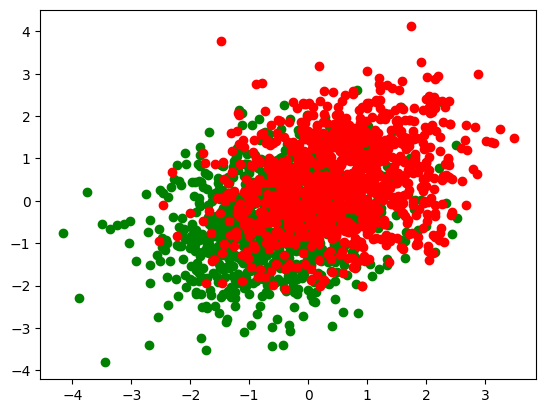

X: tensor([[ 0.2285, -1.1372],
        [ 0.7917,  1.1457],
        [-2.0838, -0.9022],
        ...,
        [-0.1030, -0.1589],
        [ 0.5606,  1.3238],
        [ 2.3719,  0.9794]]) 
X Shape torch.Size([2000, 2])


In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((1000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((1000,))
X = torch.cat([normal_distribution_a, normal_distribution_b])
plt.plot(normal_distribution_a[:,0], normal_distribution_a[:,1],'go')
plt.plot(normal_distribution_b[:,0], normal_distribution_b[:,1],'ro')
plt.show()
print("X:", X, "\nX Shape", X.shape)



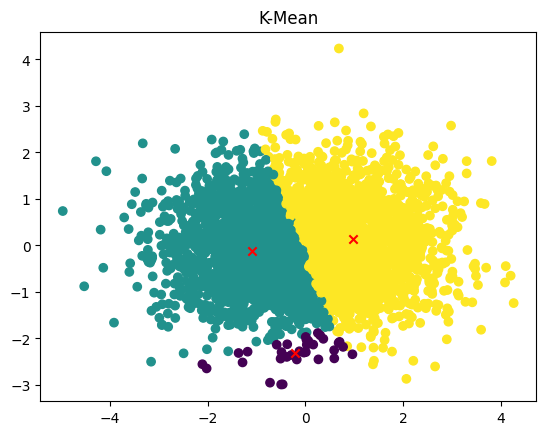

Data: tensor([[-2.1995, -0.1988],
        [-0.5752, -0.3177],
        [-0.7441,  1.3353],
        ...,
        [ 0.6206,  1.0872],
        [ 0.9569,  1.0183],
        [-0.5193,  0.9341]])


In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((2000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((2000,))
data = torch.cat([normal_distribution_a, normal_distribution_b])
n = 100
i = 1
clusters = 3
index = torch.randperm(data.shape[0])[:clusters]
centroids = data[index]
old_centroids = torch.zeros_like(centroids)
for i in range(n):
    if torch.all(torch.isclose(centroids, old_centroids)):
        break
    old_centroids = centroids
    distance = torch.cdist(data, centroids)
    labels = torch.argmin(distance, dim=1)
    for j in range(clusters):
        cluster_points = data[labels == j]
        if cluster_points.size(0) > 0:  
            centroids[j] = cluster_points.mean(dim=0)
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data.numpy())
    centroids_2d = pca.transform(centroids.numpy())
    plt.title('K-Mean')
    plt.scatter(data_2d[:,0], data_2d[:,1],c=labels.numpy())
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1],c='red', marker='x')
    plt.show()
print("Data:", data)



    

 

In [10]:
import torch

X=torch.normal(0,1,(100,4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + torch.normal(0, 0.1, (100,))
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + torch.normal(0, 0.1, (100,))
X = X - torch.mean(X, axis=0)
pca = PCA(n_components=4)
pca.fit(X)
principal_comps_builtin = pca.components_.T
print("PCA:",principal_comps_builtin)
matrix = torch.sum(torch.stack([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]), dim=0) / 100
eigenvalues, eigenvectors = torch.linalg.eigh(matrix)
order = torch.argsort(eigenvalues, descending=True)
principal_comps_byhand = eigenvectors[:,order]
print("PCA by hand:",principal_comps_byhand)

PCA: [[ 0.21492688  0.48238957 -0.25125828  0.81115721]
 [-0.12105876  0.79696465 -0.27130917 -0.52591202]
 [ 0.89009611 -0.15055468 -0.34728444 -0.25388132]
 [ 0.38324944  0.33087903  0.86177383 -0.03138157]]
PCA by hand: tensor([[-0.2149,  0.4824, -0.2512,  0.8112],
        [ 0.1211,  0.7970, -0.2713, -0.5259],
        [-0.8901, -0.1506, -0.3473, -0.2539],
        [-0.3832,  0.3309,  0.8618, -0.0314]])


<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
/var/folders/66/q21rnv5143b58h0kj1w8rgmr0000gn/T/ipykernel_21930/402758904.py:47: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_test, y_test, label="$\sin(2\pi x)$")


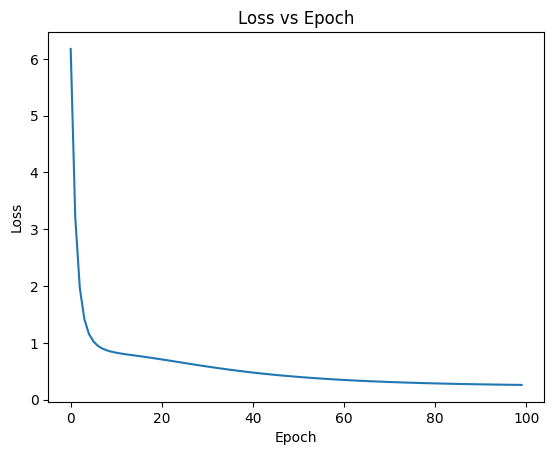

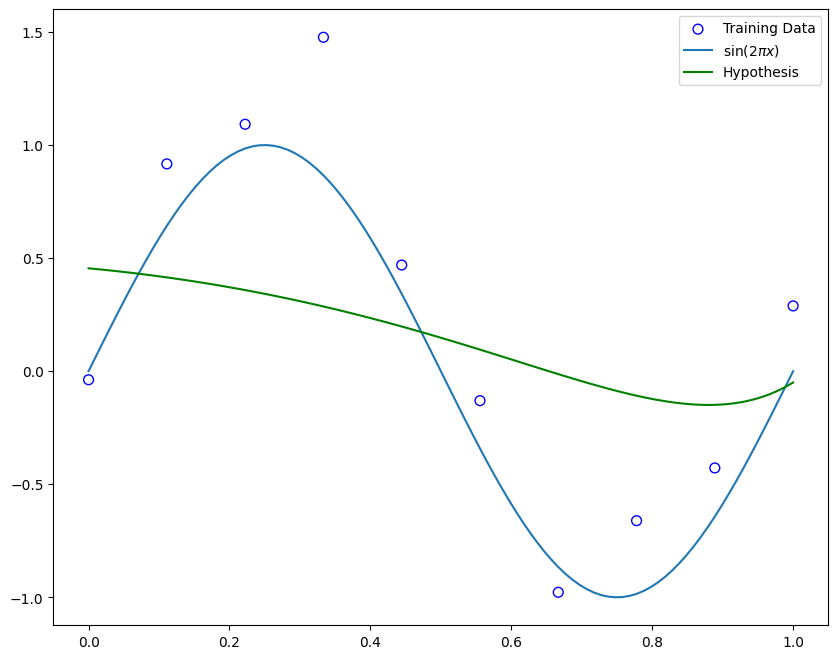

In [1]:
#Assignment 1-b - Optimization algorithms for linear regression
import numpy as np
import matplotlib.pyplot as plt
import torch

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = torch.linspace(domain[0], domain[1], sample_size)
    torch.randperm(x.size(0))
    y = func(x) + torch.normal(mean=0.0, std=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return torch.sin(2 * np.pi * x)
def create_polynomial_features(x, degree):
    return torch.stack([x ** i for i in range(1, degree + 1)], dim=1)
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = torch.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

learning_rate=0.01
lambda_val=0.1
epoch=100
degree = 9
x_train_poly = create_polynomial_features(x_train, degree)
x_test_poly = create_polynomial_features(x_test, degree)
losses = []
weight=torch.randn(degree, requires_grad=True)
bias=torch.randn(1, requires_grad=True)
for e in range(epoch):
    for i in range(x_train_poly.shape[0]):
        prediction = torch.matmul(x_train_poly[i], weight) + bias
        loss=(prediction-y_train[i]) ** 2 + lambda_val * (weight ** 2).sum() + lambda_val * (bias** 2)
        loss.backward()
        with torch.no_grad():
            weight -= learning_rate * weight.grad
            bias -= learning_rate * bias.grad
            weight.grad.zero_()
            bias.grad.zero_()
    losses.append(loss.item())
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses)
plt.show()
plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", color="b", s=50, label="Training Data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")

with torch.no_grad():  
    predictions = torch.matmul(x_test_poly, weight) + bias

plt.plot(x_test, predictions.numpy(), "-g", label="Hypothesis")
plt.legend()
plt.show()

<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\s'
/var/folders/66/q21rnv5143b58h0kj1w8rgmr0000gn/T/ipykernel_21930/604161003.py:73: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_test, y_test, label="$\sin(2\pi x)$")


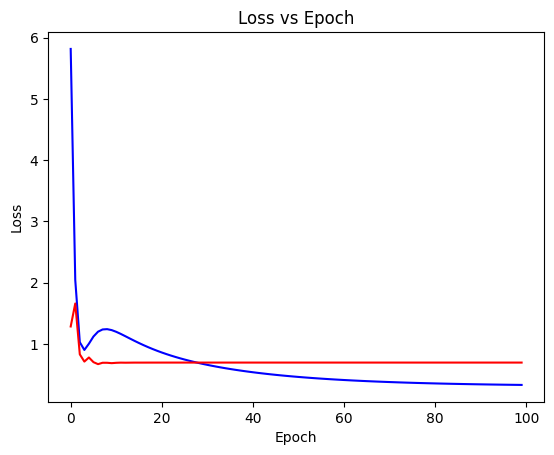

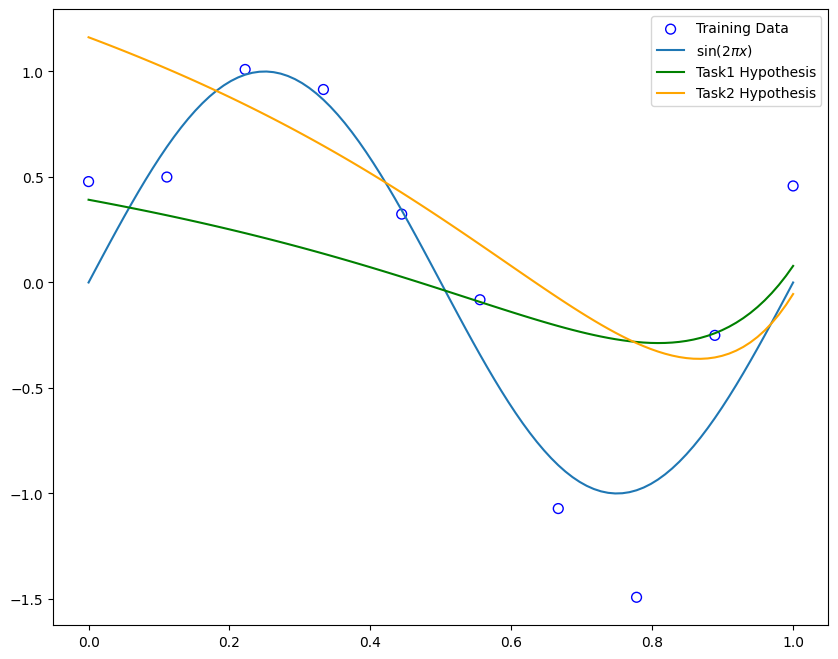

In [2]:
#Assignment 1-b - Optimization algorithms for linear regression
import numpy as np
import matplotlib.pyplot as plt
import torch

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = torch.linspace(domain[0], domain[1], sample_size)
    torch.randperm(x.size(0))
    y = func(x) + torch.normal(mean=0.0, std=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return torch.sin(2 * np.pi * x)
def create_polynomial_features(x, degree):
    return torch.stack([x ** i for i in range(1, degree + 1)], dim=1)
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = torch.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

learning_rate=0.01
lambda_val=0.1
epoch=100
degree = 9
x_train_poly = create_polynomial_features(x_train, degree)
x_test_poly = create_polynomial_features(x_test, degree)
losses = []
weight=torch.randn(degree, requires_grad=True)
bias=torch.randn(1, requires_grad=True)
for e in range(epoch):
    for i in range(x_train_poly.shape[0]):
        prediction = torch.matmul(x_train_poly[i], weight) + bias
        loss=(prediction-y_train[i]) ** 2 + lambda_val * (weight ** 2).sum() + lambda_val * (bias** 2)
        loss.backward()
        with torch.no_grad():
            weight -= learning_rate * weight.grad
            bias -= learning_rate * bias.grad
            weight.grad.zero_()
            bias.grad.zero_()
    losses.append(loss.item())

#Momentum
momentum_coefficient = 0.9
weight_momentum = torch.randn(degree, requires_grad=True)
bias_momentum = torch.randn(1, requires_grad=True)
velocity_weight = torch.zeros_like(weight_momentum)
velocity_bias= torch.zeros_like(bias_momentum)
losses_momentum = []
for e in range(epoch):
    for i in range(x_train_poly.shape[0]):
        prediction_momentum = torch.matmul(x_train_poly[i], weight_momentum) + bias_momentum
        loss_momentum = (prediction_momentum - y_train[i]) ** 2 + lambda_val * (weight_momentum ** 2).sum() + lambda_val * (bias_momentum ** 2)
        loss_momentum.backward()
        with torch.no_grad():
            velocity_weight = momentum_coefficient * velocity_weight + learning_rate * weight_momentum.grad
            velocity_bias = momentum_coefficient * velocity_bias + learning_rate * bias_momentum.grad
            weight_momentum -= velocity_weight
            weight_momentum.grad.zero_()
            bias_momentum.grad.zero_()

    losses_momentum.append(loss_momentum.item())




plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses, color='blue')
plt.plot(losses_momentum, color='red')
plt.show()
plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", color="b", s=50, label="Training Data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")

with torch.no_grad():  
    predictions = torch.matmul(x_test_poly, weight) + bias
    predictions_momentum = torch.matmul(x_test_poly, weight_momentum) + bias_momentum
    
plt.plot(x_test, predictions.numpy(), color="green", label="Task1 Hypothesis")
plt.plot(x_test, predictions_momentum.numpy(), "orange", label="Task2 Hypothesis")
plt.legend()
plt.show()

In [35]:
#Assignment 1-b - Logistic Regression
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

file_path = '/Users/komalbagwe/CS-GY-6613-Assignments/assignments/assignment-1/train.csv'
data = pd.read_csv(file_path, nrows=50000)

col_drop = ['id', 'device_id', 'device_ip'] 
data = data.drop(columns=col_drop)
data['hour'] = pd.to_datetime(data['hour'], format='%y%m%d%H')
data['hour_of_day'] = data['hour'].dt.hour 
data['day_of_week'] = data['hour'].dt.dayofweek  
data = data.drop(columns=['hour']) 
categorical_cols = ['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 
                       'app_id', 'app_domain', 'app_category', 'device_model', 
                       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 
                       'C17', 'C18', 'C19', 'C20', 'C21']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
x = data.drop(columns=['click'])  
y = data['click']  
scaler = StandardScaler()
x[['hour_of_day', 'day_of_week']] = scaler.fit_transform(x[['hour_of_day', 'day_of_week']])
x = x.astype({col: 'int32' for col in x.select_dtypes(include=['bool']).columns})
x_tensor = torch.tensor(x.values)  
y_tensor = torch.tensor(y.values)  

print(f'X shape: {x_tensor.shape}, Y shape: {y_tensor.shape}')


X shape: torch.Size([50000, 4710]), Y shape: torch.Size([50000])


X shape: torch.Size([50000, 4710]), Y shape: torch.Size([50000])


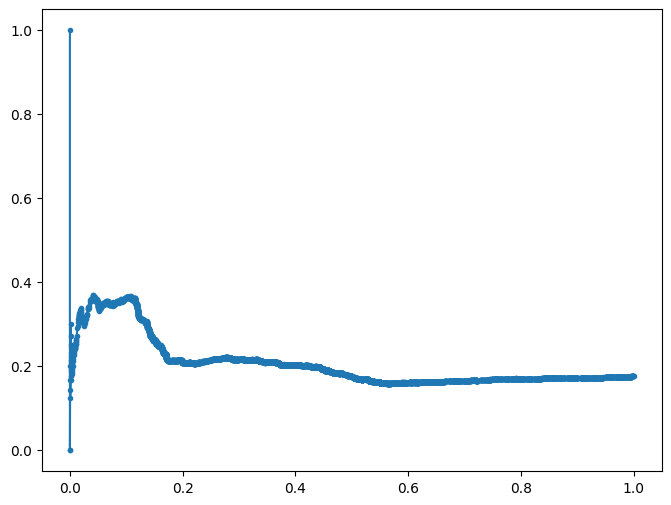

In [36]:
#Assignment 1-b - Logistic Regression
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

#Data Preprocessing

file_path = '//Users/komalbagwe/CS-GY-6613-Assignments/assignments/assignment-1/train.csv'
data = pd.read_csv(file_path, nrows=50000)

col_drop = ['id', 'device_id', 'device_ip'] 
data = data.drop(columns=col_drop)
data['hour'] = pd.to_datetime(data['hour'], format='%y%m%d%H')
data['hour_of_day'] = data['hour'].dt.hour 
data['day_of_week'] = data['hour'].dt.dayofweek  
data = data.drop(columns=['hour']) 
categorical_cols = ['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 
                       'app_id', 'app_domain', 'app_category', 'device_model', 
                       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 
                       'C17', 'C18', 'C19', 'C20', 'C21']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
x = data.drop(columns=['click'])  
y = data['click']  
scaler = StandardScaler()
x[['hour_of_day', 'day_of_week']] = scaler.fit_transform(x[['hour_of_day', 'day_of_week']])
x = x.astype({col: 'int32' for col in x.select_dtypes(include=['bool']).columns})

#made x of dtype float32
x_tensor = torch.tensor(x.values, dtype=torch.float32)  
y_tensor = torch.tensor(y.values, dtype=torch.float32)  

print(f'X shape: {x_tensor.shape}, Y shape: {y_tensor.shape}')

#logistic Regression Implementation

#logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  #output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

#divided data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

#hyperparameters added
learning_rate = 0.01
epoch = 100  

#model, loss function, and optimize initialization
input_shape = x_train.shape[1]
model = LogisticRegression(input_shape)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimization = optim.SGD(model.parameters(), lr=learning_rate)

#training the model
for e in range(epoch):
    model.train() 

    outputs = model(x_train).squeeze()  #for predictions
    loss = criterion(outputs, y_train.float())  #calculating loss

    #backward pass and optimization
    optimization.zero_grad() 
    loss.backward()  
    optimization.step()  
    if (epoch+1) % 10 == 0:  
        print(f'Epoch [{e+1}/{epoch}], Loss: {loss.item():.4f}')

#model evalation
model.eval()  
with torch.no_grad():
    y_scores = model(x_test).squeeze() 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.show()